## Foundations of Data Science: Inferential Thinking by Resampling

Mirroring course Jupyter notebook except using standard modules instead of Berkeley data science module.

## Lecture 11: Interpreting Confidence 

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 9)

### Applying the bootstrap

In [15]:
babies = pd.read_csv('data/baby.csv', usecols=['Birth Weight', 'Gestational Days'])

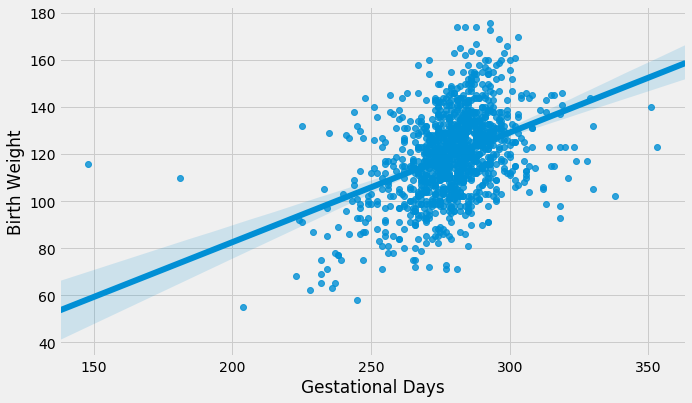

In [16]:
sns.regplot('Gestational Days', 'Birth Weight', babies)

In [18]:
babies['ratio'] = babies['Birth Weight'] / babies['Gestational Days']

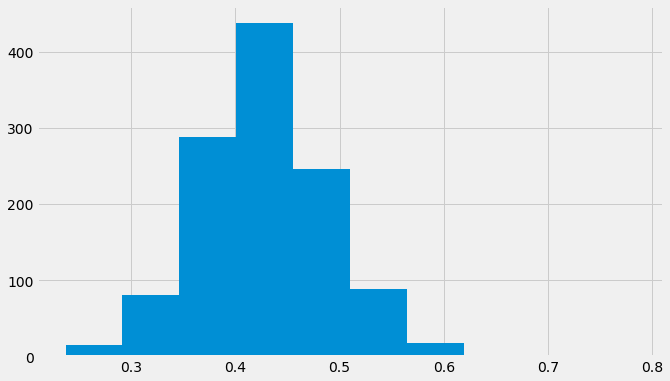

In [42]:
babies['ratio'].hist()

In [43]:
print(babies.ratio.median())
print(babies.ratio.mean())
print(babies.ratio.std())



0.42907801418439717
0.4279088748707598
0.061334691146151914


In [49]:
bootstrapped_medians = np.array([babies.ratio.sample(frac=1, replace=True)
                                 .median() for _ in range(1000)])

interval_99 = [np.percentile(bootstrapped_medians, 0.5),
               np.percentile(bootstrapped_medians, 99.5)]

interval_99

[0.4244019138755981, 0.4331563808240538]

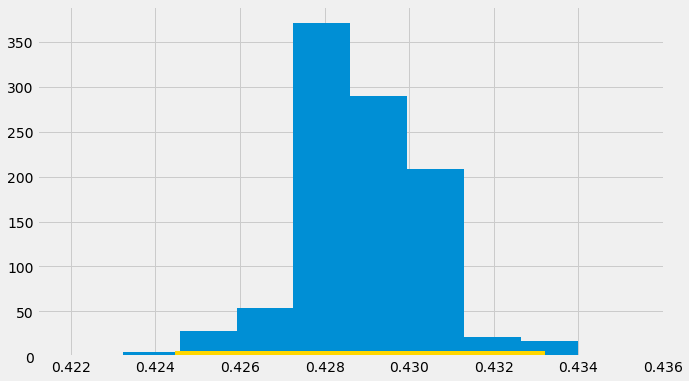

In [48]:
plt.hist(bootstrapped_medians)
plt.plot(interval_99, [0, 0], color='gold', lw=10);
plt.show()